In [9]:
!top -u

top: -u requires argument


In [10]:
!pip install wordcloud
!pip install certifi --ignore-installed

  Using cached wordcloud-1.8.0-cp36-cp36m-manylinux1_x86_64.whl (365 kB)
  Using cached matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Using cached Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)


In [4]:
!mkdir jieba_data

mkdir: cannot create directory ‘jieba_data’: File exists


In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -o jieba_data/dict.txt.big

In [11]:
jieba.set_dictionary('jieba_data/dict.txt.big')

NameError: name 'jieba' is not defined

In [28]:
from wordcloud import WordCloud

In [29]:
import matplotlib.pyplot as plt

In [30]:
from PIL import Image

In [15]:
%matplotlib inline

In [16]:
import pymongo

In [17]:
import pandas as pd

In [18]:
import jieba

In [ ]:
import re

In [27]:
import numpy as np

In [26]:
from collections import Counter

In [21]:
client = pymongo.MongoClient('192.168.158.128', 27017)

In [22]:
db = client.tibame

In [23]:
collection = db.recipe_raw

In [174]:
data = pd.DataFrame(list(collection.find()))

In [175]:
data

,_id,author,category,comment,ingredient,steps,time,title,url
0,5f58abb2226b5c697d13c9ad,Fish,健身,#今天吃這道,"橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,",雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜...,2020年09月06日 10:29,健身人 雞胸肉丼,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1358...
1,5f58abbd226b5c697d13c9ae,兒子的媽媽,健身,健身也是要吃飽飽的喔,"雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,",先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓...,2020年09月01日 13:57,健身人的餐點,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1354...
2,5f58abc9226b5c697d13c9af,兒子的媽媽,健身,,"雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,",雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|...,2020年08月28日 13:46,健身人餐點,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1351...
3,5f58abd6226b5c697d13c9b0,Holly Lu,健身,減醣、健身族看過來，懶人料理上菜囉🥰 #金廚獎 #健身 #雞胸肉 #馬鈴薯 #減醣,"雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適...",雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及...,2020年04月29日 09:53,健身餐盤 - 奶油香蒜雞胸肉佐馬鈴薯,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1232...
4,5f58abe3226b5c697d13c9b1,Wonda‘s｜窮遊女子的灶咖,健身,煎雞胸肉吃膩了，突然想到來試試看包蔬菜，但其實有點小失敗，跟大家分享做這道料理時要特別注意的...,"半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,",｜備料｜\n1. 把小黃瓜、紅蘿蔔切成條狀\n（可先燙過，加快等下煎的速度）\n2. 雞胸肉...,2020年04月10日 12:06,低醣健身料理-雞胸肉捲蔬菜,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1205...
5,5f58abef226b5c697d13c9b2,Wonda‘s｜窮遊女子的灶咖,健身,在蒸蛋中加入雞胸肉末和蔬菜，簡單一碗就能補充所需營養，適合健身和低醣飲食者食用！\n#金廚獎,"雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,",｜備料｜\n1. 紅蘿蔔切丁\n2. 雞胸肉切丁\n3. 菜脯可先泡水，避免太鹹|起油鍋，先...,2020年04月09日 11:59,減醣健身料理-蒸蛋（含蔬菜雞胸肉）,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1203...
6,5f58abfc226b5c697d13c9b3,花媽甜心派,健身,#金廚獎\n用高蛋白粉取代一般麵粉 烘烤出一款適合健身朋友食用的甜點喔\n不只香氣十足蛋白質...,"蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高...",將鮮奶油 椰子油，可可粉，放入鍋中中小火加熱約25秒勿超過50度\n再倒入巧克力豆中拌勻後加...,2020年03月15日 04:00,高蛋白巧克力蛋糕(健身甜點),https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1111...
7,5f58ac06226b5c697d13c9b4,Holly Lu,健身,挑戰不重複雞胸料理！把白飯換成蔬菜吧！\n#營養健康吃 #健身 #雞胸肉\n,"西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,",蔬菜全部切丁備用|熱鍋，將蔬菜放入鍋中炒香、再放入雞肉拌炒|下一塊咖喱，拌炒均勻再加熱水至淹...,2020年02月19日 04:24,健身餐盤 - 咖喱雞胸肉,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1159...
8,5f58ac12226b5c697d13c9b5,Holly Lu,健身,#健身 #雞胸肉 #營養健康吃,"雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,",將超市雞胸肉盤拆開，均勻灑上一茶匙鹽巴，再加滿水。浸泡20分鐘|杏鮑菇、番茄切片備用|蒜頭入...,2020年02月15日 09:47,健身餐盤 - 雙拼雞胸肉,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1154...
9,5f58ac21226b5c697d13c9b6,Holly Lu,健身,#營養健康吃 #健身 #減肥,"虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,",將魚柳半退冰、拍上少許麵粉增加吸附能力（也可省略）、灑少許胡椒鹽|中火熱鍋、將裹粉魚柳沾上蛋...,2020年02月13日 10:42,健身餐盤 - 虱目魚柳,https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1151...


In [160]:
pd_ing = data['ingredient']

In [202]:
list_ing = []
for i in data['ingredient']:
    list_ing.append(i)


In [203]:
list_ing

['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
 '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
 '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
 '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,',
 '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,',
 '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,',
 '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,',
 '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,',
 '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,',
 '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,',
 '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,',
 '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,',
 '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,',
 '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,',
 '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,',
 '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,',
 '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,',
 '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,',
 '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,',
 '食材,高麗菜 1

# 資料正規化

In [229]:
list_ing_merge = ''.join(str(list_ing[:2000]))

In [230]:
print(type(list_ing_merge))

<class 'str'>


In [231]:
list_ing_merge

"['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,', '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,', '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,', '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,', '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,', '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,', '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,', '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,', '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,', '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,', '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,', '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,', '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,', '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,', '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,', '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,', '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,', '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,', '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,', '食材,高麗菜 1/4 顆,花椰菜 1/2 顆,紅籮蔔

In [290]:
list_ing_fix =  re.sub('[*\dWA-Za-z/''\\\\]','',list_ing_merge)
list_ing_fix1 =  re.sub('[*s,⋯⋯⋯⋯⋯⋯⋯⋯]','',list_ing_fix)
list_ing_fix2 =  re.sub('[*｜（）()]','',list_ing_fix1)

In [291]:
list_ing_fix2

"['橄欖油雞胸肉 適量紅蘿蔔高麗菜全蛋喜歡的深綠色蔬菜調味料：黑胡椒、黑豆醬油、料酒' '雞肉嫩豆腐一盒白飯適量青菜適量鹽巴 白胡椒粉 雞粉' '雞蛋  雞胸肉  雪白菇 適量空心菜 適量洋蔥 適量' '雞胸肉包.條肉小馬鈴薯顆紅蘿蔔小條奶油適量蒜頭顆胡椒鹽適量鹽巴適量肉桂粉適量羅勒葉適量' '半付 雞胸肉小黃瓜  根紅蘿蔔  根鹽 少許黑胡椒 少許油 少許' '雞胸肉 半付紅蘿蔔 半根菜脯 一大匙雞蛋 兩顆鹽巴 少許白胡椒粉 少許牛奶 約一匙' '蛋白糊蛋白  顆鹽巴咪咪赤藻醣  克檸檬汁  克蛋黃糊蛋黃  顆高蛋白粉克巧克力%  克椰子油  克可可粉  克動鮮  克吋烤模 個 ' '西洋芹片雞里肌肉一盤紅蘿蔔半根小馬鈴薯兩顆' '雞胸肉片盤蒜頭瓣切末小牛番茄個小杏鮑菇支鹽巴適量芹菜末少許羅勒香料少許' '虱目魚柳盤雞蛋顆少許麵粉胡椒鹽適量' '雞胸肉兩片起司一把胡椒鹽紅蔥頭兩顆' '雞胸肉塊需完全退冰珍珠馬鈴薯-顆四季豆一把洋蔥半顆里肌培根一份橄欖油起司絲適量胡椒鹽鮮蒜末一把迷迭香香料蒜粉紅椒粉' '一盤雞胸一把糯米椒一顆馬鈴薯紅椒粉少許鹽巴少許迷迭香少許' '酪梨  顆半熟雞蛋  顆柚香檸檬沙拉醬 些許黑胡椒 些許迷迭香 些許麵包吐司' '雞胸肉  克嫩豆腐  盒牛番茄  顆無糖豆漿  味噌  克海帶芽 少許蔥末 適量白胡椒粉 適量' '雞胸肉 附鹽巴 些許黑胡椒 些許' '預備食材蛋 一個全麥冷凍鬆餅 一個莎莎醬 一大匙橄欖油 適量' '絲瓜  條大陸妹  份花椰菜 適量雞胸肉 附鴻禧菇  包木耳 適量調味料 適量蝦米、乾香菇 適量五穀米  杯' '雞蛋-顆 小顆的蛋請用顆，第顆取蛋白就好希臘優格大匙鹽 適量胡椒 適量手做藜麥吐司  片' '食材高麗菜  顆花椰菜  顆紅籮蔔  條地瓜  條洋蔥 青江菜 適量雞蛋  顆調味料黑胡椒鹽黑芝麻 適量和風醬 小碟' '去皮雞胸肉一副牛油果一顆拳頭大小菠菜葉 適量雞蛋二顆低脂高鈣起士兩片全麥墨西哥餅皮醃料醬油一大匙蜂蜜一小匙清酒一小匙可用米酒代替，不加也可以' '鮪魚薯泥馬鈴薯  蒜頭  小瓣牛奶  水煮鮪魚罐頭  罐鹽 適量甜豆炒炒蝦仁甜豆  蝦仁  洋蔥 半顆杏鮑菇  鹽  小匙黑胡椒粉 適量煎節瓜節瓜  鹽  小匙綜合香料 適量水煮蛋&青菜雞蛋  顆青花菜  玉米筍  ' '秋刀魚  條番茄  顆洋蔥  顆蒜

In [262]:
list_ing_fix1

"['橄欖油雞胸肉 適量紅蘿蔔高麗菜全蛋喜歡的深綠色蔬菜調味料：黑胡椒、黑豆醬油、料酒' '雞肉嫩豆腐一盒白飯適量青菜適量鹽巴 白胡椒粉 雞粉' '雞蛋  雞胸肉  雪白菇 適量空心菜 適量洋蔥 適量' '雞胸肉包.條肉小馬鈴薯顆紅蘿蔔小條奶油適量蒜頭顆胡椒鹽適量鹽巴適量肉桂粉適量羅勒葉適量' '半付 雞胸肉小黃瓜  根紅蘿蔔  根鹽 少許黑胡椒 少許油 少許' '雞胸肉 半付紅蘿蔔 半根菜脯 一大匙雞蛋 兩顆鹽巴 少許白胡椒粉 少許牛奶 約一匙' '蛋白糊蛋白  顆鹽巴咪咪赤藻醣  克檸檬汁  克蛋黃糊蛋黃  顆高蛋白粉克巧克力%  克椰子油  克可可粉  克動鮮  克吋烤模 個 ' '西洋芹片雞里肌肉一盤紅蘿蔔半根小馬鈴薯兩顆' '雞胸肉片盤蒜頭瓣切末小牛番茄個小杏鮑菇支鹽巴適量芹菜末少許羅勒香料少許' '虱目魚柳盤雞蛋顆少許麵粉胡椒鹽適量' '雞胸肉兩片起司一把胡椒鹽紅蔥頭兩顆' '雞胸肉塊（需完全退冰）珍珠馬鈴薯-顆四季豆一把洋蔥半顆里肌培根一份橄欖油起司絲適量胡椒鹽鮮蒜末一把迷迭香香料蒜粉紅椒粉' '一盤雞胸一把糯米椒一顆馬鈴薯紅椒粉少許鹽巴少許迷迭香少許' '酪梨  顆半熟雞蛋  顆柚香檸檬沙拉醬 些許黑胡椒 些許迷迭香 些許麵包吐司' '雞胸肉  克嫩豆腐  盒牛番茄  顆無糖豆漿  味噌  克海帶芽 少許蔥末 適量白胡椒粉 適量' '雞胸肉 附鹽巴 些許黑胡椒 些許' '預備食材蛋 一個全麥冷凍鬆餅 一個莎莎醬 一大匙橄欖油 適量' '絲瓜  條大陸妹  份花椰菜 適量雞胸肉 附鴻禧菇  包木耳 適量調味料 適量蝦米、乾香菇 適量五穀米  杯' '雞蛋-顆 小顆的蛋請用顆，第顆取蛋白就好希臘優格大匙鹽 適量胡椒 適量手做藜麥吐司  片' '食材高麗菜  顆花椰菜  顆紅籮蔔  條地瓜  條洋蔥 青江菜 適量雞蛋  顆調味料黑胡椒鹽黑芝麻 適量和風醬 小碟' '去皮雞胸肉一副牛油果一顆拳頭大小菠菜葉 適量雞蛋二顆低脂高鈣起士兩片全麥墨西哥餅皮醃料醬油一大匙蜂蜜一小匙清酒一小匙可用米酒代替，不加也可以' '鮪魚薯泥馬鈴薯  蒜頭  小瓣牛奶  水煮鮪魚罐頭  罐鹽 適量甜豆炒炒蝦仁甜豆  蝦仁  洋蔥 半顆杏鮑菇  鹽  小匙黑胡椒粉 適量煎節瓜節瓜  鹽  小匙綜合香料 適量水煮蛋&青菜雞蛋  顆青花菜  玉米筍  ' '秋刀魚  條番茄  顆洋蔥  

# 斷詞

In [283]:
list_ing_fix2

"['橄欖油雞胸肉 適量紅蘿蔔高麗菜全蛋喜歡的深綠色蔬菜調味料：黑胡椒、黑豆醬油、料酒' '雞肉嫩豆腐一盒白飯適量青菜適量鹽巴 白胡椒粉 雞粉' '雞蛋  雞胸肉  雪白菇 適量空心菜 適量洋蔥 適量' '雞胸肉包(.條肉)小馬鈴薯顆紅蘿蔔小條奶油適量蒜頭顆胡椒鹽適量鹽巴適量肉桂粉適量羅勒葉適量' '半付 雞胸肉小黃瓜  根紅蘿蔔  根鹽 少許黑胡椒 少許油 少許' '雞胸肉 半付紅蘿蔔 半根菜脯 一大匙雞蛋 兩顆鹽巴 少許白胡椒粉 少許牛奶 約一匙' '蛋白糊蛋白  顆鹽巴咪咪赤藻醣  克檸檬汁  克蛋黃糊蛋黃  顆高蛋白粉克巧克力%  克椰子油  克可可粉  克動鮮  克吋烤模 個 ' '西洋芹片雞里肌肉一盤紅蘿蔔半根小馬鈴薯兩顆' '雞胸肉片盤蒜頭瓣切末小牛番茄個小杏鮑菇支鹽巴適量芹菜末少許羅勒香料少許' '虱目魚柳盤雞蛋顆少許麵粉胡椒鹽適量' '雞胸肉兩片起司一把胡椒鹽紅蔥頭兩顆' '雞胸肉塊（需完全退冰）珍珠馬鈴薯-顆四季豆一把洋蔥半顆里肌培根一份橄欖油起司絲適量胡椒鹽鮮蒜末一把迷迭香香料蒜粉紅椒粉' '一盤雞胸一把糯米椒一顆馬鈴薯紅椒粉少許鹽巴少許迷迭香少許' '酪梨  顆半熟雞蛋  顆柚香檸檬沙拉醬 些許黑胡椒 些許迷迭香 些許麵包吐司' '雞胸肉  克嫩豆腐  盒牛番茄  顆無糖豆漿  味噌  克海帶芽 少許蔥末 適量白胡椒粉 適量' '雞胸肉 附鹽巴 些許黑胡椒 些許' '預備食材蛋 一個全麥冷凍鬆餅 一個莎莎醬 一大匙橄欖油 適量' '絲瓜  條大陸妹  份花椰菜 適量雞胸肉 附鴻禧菇  包木耳 適量調味料 適量蝦米、乾香菇 適量五穀米  杯' '雞蛋-顆 (小顆的蛋請用顆，第顆取蛋白就好)希臘優格大匙鹽 適量胡椒 適量手做藜麥吐司  片' '食材高麗菜  顆花椰菜  顆紅籮蔔  條地瓜  條洋蔥 青江菜 適量雞蛋  顆調味料黑胡椒鹽黑芝麻 適量和風醬 小碟' '去皮雞胸肉一副牛油果一顆(拳頭大小)菠菜葉 適量雞蛋二顆低脂高鈣起士兩片全麥墨西哥餅皮醃料醬油一大匙蜂蜜一小匙清酒一小匙(可用米酒代替，不加也可以)' '鮪魚薯泥馬鈴薯  蒜頭  小瓣牛奶  水煮鮪魚罐頭  罐鹽 適量甜豆炒炒蝦仁甜豆  蝦仁  洋蔥 半顆杏鮑菇  鹽  小匙黑胡椒粉 適量煎節瓜節瓜  鹽  小匙綜合香料 適量水煮蛋&青菜雞蛋  顆青花菜  玉米筍  ' '秋刀魚  條番

In [292]:
ing_words_list = jieba.lcut(list_ing_fix2)

In [301]:
ing_words_list

['[',
 "'",
 '橄欖油',
 '雞',
 '胸肉',
 ' ',
 '適量',
 '紅蘿',
 '蔔',
 '高麗菜',
 '全蛋',
 '喜歡',
 '的',
 '深綠色',
 '蔬菜',
 '調味料',
 '：',
 '黑胡椒',
 '、',
 '黑豆',
 '醬油',
 '、',
 '料酒',
 "'",
 ' ',
 "'",
 '雞肉',
 '嫩豆腐',
 '一盒',
 '白飯',
 '適量',
 '青菜',
 '適量',
 '鹽巴',
 ' ',
 '白',
 '胡椒粉',
 ' ',
 '雞粉',
 "'",
 ' ',
 "'",
 '雞蛋',
 ' ',
 ' ',
 '雞',
 '胸肉',
 ' ',
 ' ',
 '雪白',
 '菇',
 ' ',
 '適量',
 '空心菜',
 ' ',
 '適量',
 '洋蔥',
 ' ',
 '適量',
 "'",
 ' ',
 "'",
 '雞胸',
 '肉包',
 '.',
 '條肉',
 '小馬鈴薯',
 '顆紅蘿',
 '蔔',
 '小條',
 '奶油',
 '適量',
 '蒜',
 '頭顆',
 '胡椒',
 '鹽',
 '適量',
 '鹽巴',
 '適量',
 '肉桂粉',
 '適量羅勒葉',
 '適量',
 "'",
 ' ',
 "'",
 '半付',
 ' ',
 '雞',
 '胸肉',
 '小黃瓜',
 ' ',
 ' ',
 '根紅蘿',
 '蔔',
 ' ',
 ' ',
 '根鹽',
 ' ',
 '少許',
 '黑胡椒',
 ' ',
 '少',
 '許油',
 ' ',
 '少許',
 "'",
 ' ',
 "'",
 '雞',
 '胸肉',
 ' ',
 '半付',
 '紅蘿',
 '蔔',
 ' ',
 '半根',
 '菜脯',
 ' ',
 '一',
 '大匙',
 '雞蛋',
 ' ',
 '兩顆',
 '鹽巴',
 ' ',
 '少許',
 '白',
 '胡椒粉',
 ' ',
 '少許',
 '牛奶',
 ' ',
 '約',
 '一匙',
 "'",
 ' ',
 "'",
 '蛋白',
 '糊',
 '蛋白',
 ' ',
 ' ',
 '顆鹽',
 '巴',
 '咪咪',
 '赤藻',
 '醣',
 ' ',
 ' ',
 '克',
 '檸檬汁

# 停止字

In [304]:
stop_words_list = []
with open(file='stop_word.txt',mode='r', encoding="UTF-8") as file:
    for line in file:
        line = line.strip()
        stop_words_list.append(line)
stop_words_list

['茶匙',
 '醬油',
 '辣椒',
 '大匙',
 '小匙',
 '醬',
 '少許',
 '米酒',
 '適量',
 '鹽',
 '糖',
 '水',
 '匙',
 '香油',
 '黑胡椒',
 '胡椒粉',
 '油',
 '薑',
 '盒']

In [306]:
ing_words_list = jieba.lcut(list_ing_fix2)
ing_words_list_stopword = []
for term in ing_words_list:
    if term not in stop_words_list:
        ing_words_list_stopword.append(term)
ing_words_list_stopword

['[',
 "'",
 '橄欖油',
 '雞',
 '胸肉',
 ' ',
 '紅蘿',
 '蔔',
 '高麗菜',
 '全蛋',
 '喜歡',
 '的',
 '深綠色',
 '蔬菜',
 '調味料',
 '：',
 '、',
 '黑豆',
 '、',
 '料酒',
 "'",
 ' ',
 "'",
 '雞肉',
 '嫩豆腐',
 '一盒',
 '白飯',
 '青菜',
 '鹽巴',
 ' ',
 '白',
 ' ',
 '雞粉',
 "'",
 ' ',
 "'",
 '雞蛋',
 ' ',
 ' ',
 '雞',
 '胸肉',
 ' ',
 ' ',
 '雪白',
 '菇',
 ' ',
 '空心菜',
 ' ',
 '洋蔥',
 ' ',
 "'",
 ' ',
 "'",
 '雞胸',
 '肉包',
 '.',
 '條肉',
 '小馬鈴薯',
 '顆紅蘿',
 '蔔',
 '小條',
 '奶油',
 '蒜',
 '頭顆',
 '胡椒',
 '鹽巴',
 '肉桂粉',
 '適量羅勒葉',
 "'",
 ' ',
 "'",
 '半付',
 ' ',
 '雞',
 '胸肉',
 '小黃瓜',
 ' ',
 ' ',
 '根紅蘿',
 '蔔',
 ' ',
 ' ',
 '根鹽',
 ' ',
 ' ',
 '少',
 '許油',
 ' ',
 "'",
 ' ',
 "'",
 '雞',
 '胸肉',
 ' ',
 '半付',
 '紅蘿',
 '蔔',
 ' ',
 '半根',
 '菜脯',
 ' ',
 '一',
 '雞蛋',
 ' ',
 '兩顆',
 '鹽巴',
 ' ',
 '白',
 ' ',
 '牛奶',
 ' ',
 '約',
 '一匙',
 "'",
 ' ',
 "'",
 '蛋白',
 '糊',
 '蛋白',
 ' ',
 ' ',
 '顆鹽',
 '巴',
 '咪咪',
 '赤藻',
 '醣',
 ' ',
 ' ',
 '克',
 '檸檬汁',
 ' ',
 ' ',
 '克蛋黃糊蛋',
 '黃',
 ' ',
 ' ',
 '顆高',
 '蛋白粉',
 '克',
 '巧克力',
 '%',
 ' ',
 ' ',
 '克',
 '椰子油',
 ' ',
 ' ',
 '克',
 '可可粉',
 ' ',
 ' ',
 '克動鮮',


In [314]:
ing_counter = Counter(ing_words_list_stopword)

In [315]:
ing_counter

Counter({'[': 7,
         "'": 3976,
         '橄欖油': 150,
         '雞': 589,
         '胸肉': 329,
         ' ': 8928,
         '紅蘿': 107,
         '蔔': 228,
         '高麗菜': 56,
         '全蛋': 16,
         '喜歡': 14,
         '的': 114,
         '深綠色': 1,
         '蔬菜': 29,
         '調味料': 96,
         '：': 50,
         '、': 160,
         '黑豆': 5,
         '料酒': 26,
         '雞肉': 27,
         '嫩豆腐': 105,
         '一盒': 111,
         '白飯': 7,
         '青菜': 9,
         '鹽巴': 128,
         '白': 125,
         '雞粉': 13,
         '雞蛋': 131,
         '雪白': 16,
         '菇': 26,
         '空心菜': 13,
         '洋蔥': 100,
         '雞胸': 63,
         '肉包': 8,
         '.': 307,
         '條肉': 1,
         '小馬鈴薯': 2,
         '顆紅蘿': 15,
         '小條': 8,
         '奶油': 145,
         '蒜': 111,
         '頭顆': 27,
         '胡椒': 113,
         '肉桂粉': 18,
         '適量羅勒葉': 1,
         '半付': 6,
         '小黃瓜': 59,
         '根紅蘿': 9,
         '根鹽': 19,
         '少': 54,
         '許油': 11,
         '半根': 22,
 

In [316]:
ing_counter_1 = Counter(sorted(ing_words_list))

In [317]:
ing_counter_1

Counter({' ': 8928,
         '$': 2,
         '%': 11,
         '&': 9,
         "'": 3976,
         '+': 14,
         '-': 281,
         '.': 307,
         '.%': 1,
         '..': 9,
         '...': 1,
         ':': 10,
         ';': 12,
         '<': 2,
         '=': 9,
         '>': 2,
         '[': 7,
         ']': 7,
         '_': 8,
         '~': 102,
         '¼': 5,
         '½': 5,
         '×': 2,
         'ñ': 1,
         '˙': 1,
         '‘': 1,
         '’': 1,
         '※': 1,
         '℃': 1,
         '▪': 14,
         '●': 7,
         '☆': 11,
         '⚠': 2,
         '✍': 6,
         '⭐': 4,
         '⽔': 1,
         '、': 160,
         '。': 10,
         '《': 2,
         '》': 2,
         '「': 1,
         '」': 1,
         '【': 3,
         '】': 3,
         'お': 1,
         'か': 1,
         'ら': 1,
         'ウ': 1,
         'ダ': 1,
         'パ': 1,
         'ポ': 1,
         'ン': 1,
         'ー': 1,
         'ㄅ': 1,
         'ㄐ': 1,
         'ㄢ': 1,
         'ㄧ': 40,
     

In [66]:
with open ('ing_counter.csv','w',encoding='utf-8') as f :
    f.write(str(ing_counter))

# 文字雲

In [318]:
worldcloud = WordCloud(font_path='./fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(ing_counter)

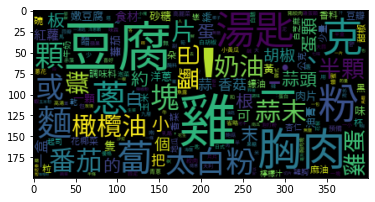

In [319]:
plt.imshow(worldcloud, interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

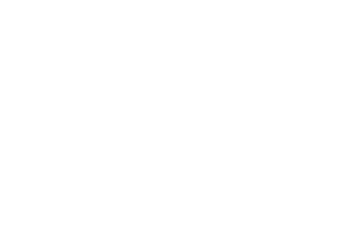

In [300]:
plt.axis('off')

In [34]:
plt.show()

In [ ]:
f = open(r'./test0916.txt',encoding='utf-8')

In [ ]:
print(f.read())

In [37]:
queryArgs = {}
projectFeild = {'url' : True , 'ingredient': True}
search_response = db.recipe_raw.find(queryArgs,projectFeild)

In [38]:
recipe_lst = []
for item in search_response:
    try:
        recipe_lst.append(item['ingredient'])
    except Exception as error_name:
        print(error_name)
        pass

'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'


In [57]:
ingredient_str = ''
for item in recipe_lst:
    try:
        ingredient_str = ingredient_str + item
    except Exception as error_name:
        print(error_name)
        pass

In [58]:
print(type(ingredient_str))

<class 'str'>


In [9]:
queryArgs = {}
projectField = {'url' : True, 'title' : True, 'time' : True, 'author' : True, 'ingredient' : True, 'stpes' : True, 'comment' : True}
search_response = db.recipe_raw.find(queryArgs, projection=projectField)

print(type(search_response))

result_recipe = []
for n, item in enumerate(search_response):
    result_recipe.append(item)

<class 'pymongo.cursor.Cursor'>


In [10]:
result_recipe

[{'_id': ObjectId('5f58abb2226b5c697d13c9ad'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13580912-%E5%81%A5%E8%BA%AB%E4%BA%BA-%E9%9B%9E%E8%83%B8%E8%82%89%E4%B8%BC',
  'title': '健身人 雞胸肉丼',
  'time': '2020年09月06日 10:29',
  'author': 'Fish',
  'ingredient': '橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
  'comment': '#今天吃這道'},
 {'_id': ObjectId('5f58abbd226b5c697d13c9ae'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13547262-%E5%81%A5%E8%BA%AB%E4%BA%BA%E7%9A%84%E9%A4%90%E9%BB%9E',
  'title': '健身人的餐點',
  'time': '2020年09月01日 13:57',
  'author': '兒子的媽媽',
  'ingredient': '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
  'comment': '健身也是要吃飽飽的喔'},
 {'_id': ObjectId('5f58abc9226b5c697d13c9af'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13519162-%E5%81%A5%E8%BA%AB%E4%BA%BA%E9%A4%90%E9%BB%9E',
  'title': '健身人餐點',
  'time': '2020年08月28日 13:46',
  'author': '兒子的媽媽',
  'ingredient': '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
  'comment': ''},
 {'_id': ObjectId('5f58abd6226b5c697d